In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/advertising.csv')

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [ ]:
data.info

<bound method DataFrame.info of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgener

In [ ]:
data.shape

(1000, 10)

In [ ]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [ ]:
data.Country.nunique()

237

In [ ]:
data.City.nunique()

969

In [ ]:
data.Ad Topic Line.nunique()

SyntaxError: ignored

Text(0.5, 1.0, 'Box plot of Daily Time Spent on Site')

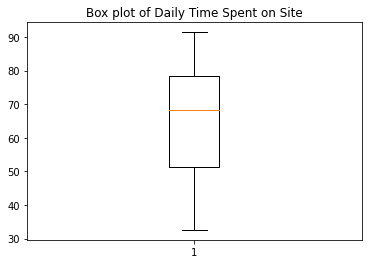

In [ ]:
plt.boxplot(data['Daily Time Spent on Site'])
plt.title('Box plot of Daily Time Spent on Site')

In [ ]:
data.drop(['Country','Timestamp'],axis=1,inplace=True)

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


Text(0.5, 1.0, 'Box plot of Area Income')

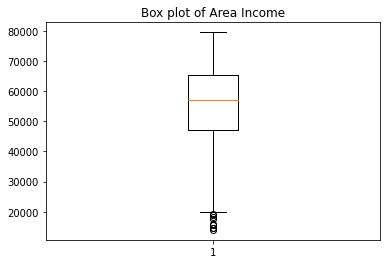

In [ ]:
plt.boxplot(data['Area Income'])
plt.title('Box plot of Area Income')

In [ ]:
q1=np.percentile(data['Area Income'],25,interpolation='midpoint')
q2=np.percentile(data['Area Income'],50,interpolation='midpoint')
q3=np.percentile(data['Area Income'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

47012.585
57012.3
65479.35


In [ ]:
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr

print(low_limit)
print(up_limit)

19312.4375
93179.4975


In [ ]:
outlier=[]
for X in data['Area Income']:
   if((X>up_limit) or (X<low_limit)):
     outlier.append(X)

outlier

[17709.98, 18819.34, 15598.29, 15879.1, 14548.06, 13996.5, 14775.5, 18368.57]

In [ ]:
ind1=data['Area Income']<low_limit
data.loc[ind1].index

Int64Index([135, 510, 640, 665, 692, 768, 778, 952], dtype='int64')

In [ ]:
data.drop([135, 510, 640, 665, 692, 768, 778, 952],inplace=True)

Text(0.5, 1.0, 'Box plot of Area Income')

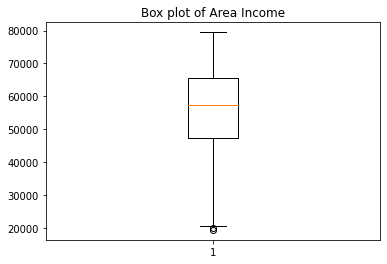

In [ ]:
plt.boxplot(data['Area Income'])
plt.title('Box plot of Area Income')

Text(0.5, 1.0, 'Box plot of Daily Internet Usage')

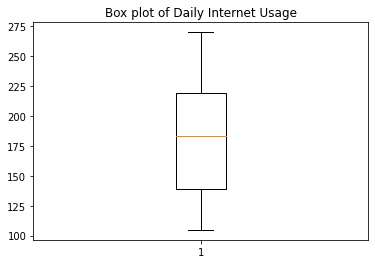

In [ ]:
plt.boxplot(data['Daily Internet Usage'])
plt.title('Box plot of Daily Internet Usage')

In [ ]:
data=pd.get_dummies(data)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


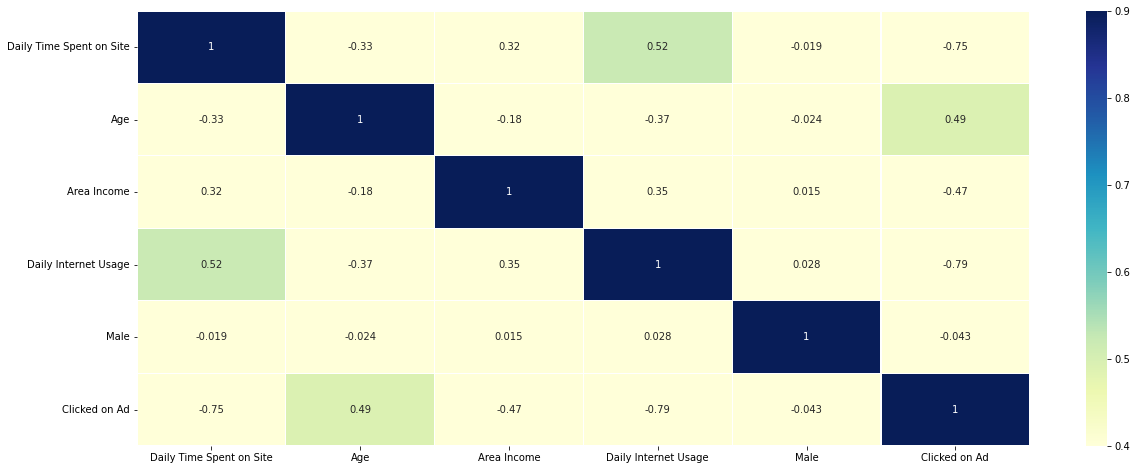

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
y=data['Clicked on Ad']
X=data.drop('Clicked on Ad',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn import linear_model
lr=linear_model.LogisticRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
predictions

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0])

In [ ]:
print(y_test)

214    0
332    1
502    0
310    0
88     1
      ..
710    1
306    0
816    1
238    1
759    1
Name: Clicked on Ad, Length: 199, dtype: int64


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSC is:',mean_squared_error(y_test,predictions))

MSC is: 0.11557788944723618


In [ ]:
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,predictions))

R squared value is : 0.5376767676767678


In [ ]:
X.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
count,992.000000,992.000000,992.000000,992.000000,992.000000
mean,65.039788,35.982863,55312.807198,179.985040,0.478831
std,15.901600,8.800784,13005.290554,44.031632,0.499804
min,32.600000,19.000000,19345.360000,104.780000,0.000000
25%,51.285000,29.000000,47332.817500,138.647500,0.000000
50%,68.390000,35.000000,57228.185000,183.425000,0.000000
75%,78.585000,42.000000,65518.960000,218.842500,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
X=standards.fit_transform(X)

In [ ]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4
count,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02
mean,4.834842e-17,-1.522080e-16,-8.953411e-19,-3.115787e-16,1.038596e-16
std,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00
min,-2.041062e+00,-1.930672e+00,-2.766996e+00,-1.708839e+00,-9.585208e-01
25%,-8.654303e-01,-7.938367e-01,-6.139052e-01,-9.392882e-01,-9.585208e-01
50%,2.107902e-01,-1.117354e-01,1.473511e-01,7.816414e-02,-9.585208e-01
75%,8.522440e-01,6.840496e-01,7.851652e-01,8.829348e-01,1.043274e+00
max,1.660432e+00,2.844037e+00,1.859565e+00,2.044447e+00,1.043274e+00


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42,test_size=0.2)
lr=linear_model.LogisticRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE IS :',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))

MSE IS : 0.035175879396984924
R squared value is : 0.8592929292929293


In [ ]:
X=data.drop('Clicked on Ad',axis=1)
X.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
count,992.000000,992.000000,992.000000,992.000000,992.000000
mean,65.039788,35.982863,55312.807198,179.985040,0.478831
std,15.901600,8.800784,13005.290554,44.031632,0.499804
min,32.600000,19.000000,19345.360000,104.780000,0.000000
25%,51.285000,29.000000,47332.817500,138.647500,0.000000
50%,68.390000,35.000000,57228.185000,183.425000,0.000000
75%,78.585000,42.000000,65518.960000,218.842500,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [ ]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4
count,992.000000,992.000000,992.000000,992.000000,992.000000
mean,0.551416,0.404354,0.598068,0.455291,0.478831
std,0.270297,0.209542,0.216252,0.266568,0.499804
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317610,0.238095,0.465376,0.205034,0.000000
50%,0.608363,0.380952,0.629916,0.476117,0.000000
75%,0.781659,0.547619,0.767776,0.690535,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LogisticRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE IS :',mean_squared_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,prediction))

MSE IS : 0.11557788944723618
R squared value is : 0.8592929292929293


In [ ]:
X=data.drop('Clicked on Ad',axis=1)
X.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
count,992.000000,992.000000,992.000000,992.000000,992.000000
mean,65.039788,35.982863,55312.807198,179.985040,0.478831
std,15.901600,8.800784,13005.290554,44.031632,0.499804
min,32.600000,19.000000,19345.360000,104.780000,0.000000
25%,51.285000,29.000000,47332.817500,138.647500,0.000000
50%,68.390000,35.000000,57228.185000,183.425000,0.000000
75%,78.585000,42.000000,65518.960000,218.842500,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [ ]:
X=pd.DataFrame(X)
X.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
count,992.000000,992.000000,992.000000,992.000000,992.000000
mean,65.039788,35.982863,55312.807198,179.985040,0.478831
std,15.901600,8.800784,13005.290554,44.031632,0.499804
min,32.600000,19.000000,19345.360000,104.780000,0.000000
25%,51.285000,29.000000,47332.817500,138.647500,0.000000
50%,68.390000,35.000000,57228.185000,183.425000,0.000000
75%,78.585000,42.000000,65518.960000,218.842500,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LogisticRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE IS :',mean_squared_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,predictions))

MSE IS : 0.11557788944723618
R squared value is : 0.5376767676767678


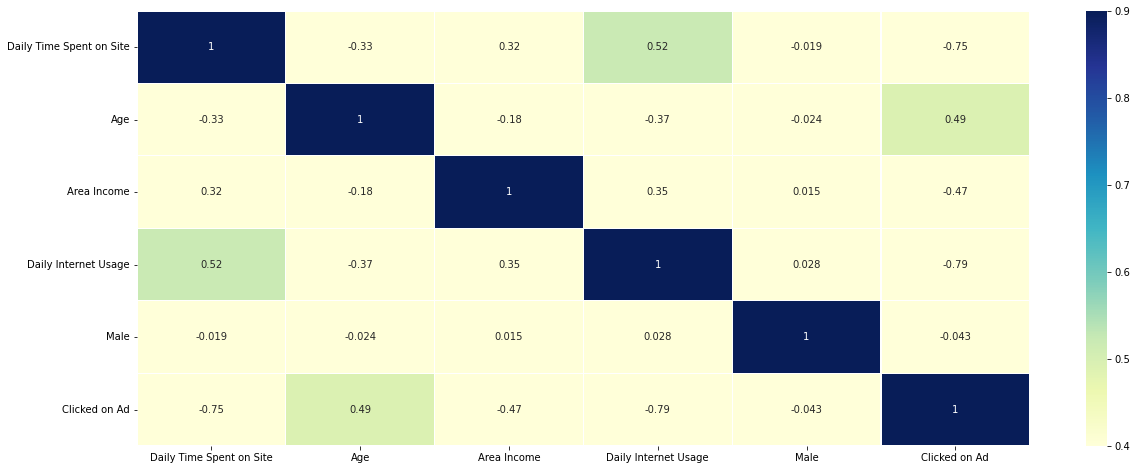

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')

In [ ]:
y=data['Clicked on Ad']
X=data.drop('Clicked on Ad',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LogisticRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE IS :',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,predictions))

MSE IS : 0.11557788944723618
R squared value is : 0.5376767676767678
